### Import library and data preparation

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import os
from collections import Counter

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from matplotlib import pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier

In [ ]:
os.environ['KAGGLE_USERNAME'] = "yusufsyam"
os.environ['KAGGLE_KEY'] = "92e542e0f01ebd3b10eae4f476d8a6fd"

import kaggle

In [ ]:
!kaggle datasets download -d sagnik1511/car-insurance-data --force

  0% 0.00/222k [00:00<?, ?B/s]
100% 222k/222k [00:00<00:00, 93.7MB/s]


In [ ]:
!unzip -q /content/car-insurance-data.zip

# Data exploration

In [ ]:
df_raw= pd.read_csv('/content/Car_Insurance_Claim.csv')

df_raw

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


In [ ]:
df_raw.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


Get Missing Value

In [ ]:
df_raw.isnull().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

All columns to lower

In [ ]:
df_raw.columns= df_raw.columns.map(lambda x: x.lower())
df_raw.columns

Index(['id', 'age', 'gender', 'race', 'driving_experience', 'education',
       'income', 'credit_score', 'vehicle_ownership', 'vehicle_year',
       'married', 'children', 'postal_code', 'annual_mileage', 'vehicle_type',
       'speeding_violations', 'duis', 'past_accidents', 'outcome'],
      dtype='object')

Get object type column

In [ ]:
string_columns= list(df_raw.select_dtypes(include=['object']).columns.values)
string_columns

['age',
 'gender',
 'race',
 'driving_experience',
 'education',
 'income',
 'vehicle_year',
 'vehicle_type']

In [ ]:
df_obj_data_count= pd.DataFrame()

for col in string_columns:
    c = Counter(df_raw[col])
    temp_df= pd.DataFrame(Counter(df_raw[col]).most_common(), columns= ['category', 'count'])
    # temp_df['percentage']= [c[i] / len(df_raw[col]) * 100.0 for i in c]

    print("\n"+col)
    print(temp_df)
    print("\n======================================")
    print("======================================")


age
  category  count
0    26-39   3063
1    40-64   2931
2    16-25   2016
3      65+   1990


gender
  category  count
0   female   5010
1     male   4990


race
   category  count
0  majority   9012
1  minority    988


driving_experience
  category  count
0     0-9y   3530
1   10-19y   3299
2   20-29y   2119
3     30y+   1052


education
      category  count
0  high school   4157
1   university   3928
2         none   1915


income
        category  count
0    upper class   4336
1   middle class   2138
2        poverty   1814
3  working class   1712


vehicle_year
      category  count
0  before 2015   6967
1   after 2015   3033


vehicle_type
     category  count
0       sedan   9523
1  sports car    477



# Data PreProcessing

In [ ]:
df_proc= df_raw.copy()
df_proc

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


### Handling Missing Value

In [ ]:
df_proc.isnull().sum()

id                       0
age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
duis                     0
past_accidents           0
outcome                  0
dtype: int64

In [ ]:
columns_with_nan_to_drop = ['credit_score','annual_mileage']
df_proc2 = df_proc.dropna(subset=columns_with_nan_to_drop).reset_index(drop=True)

len(df_proc2)

8149

### Feature Selection

In [ ]:
df_proc3= df_proc2.copy()

In [ ]:
df_proc3.columns

Index(['id', 'age', 'gender', 'race', 'driving_experience', 'education',
       'income', 'credit_score', 'vehicle_ownership', 'vehicle_year',
       'married', 'children', 'postal_code', 'annual_mileage', 'vehicle_type',
       'speeding_violations', 'duis', 'past_accidents', 'outcome'],
      dtype='object')

Memilih kolom yang mana yang dihapus

In [ ]:
cols_to_drop=['id', 'postal_code']
df_proc3.drop(cols_to_drop, axis='columns', inplace=True)

In [ ]:
df_proc3

,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,12000.0,sedan,0,0,0,0.0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,16000.0,sedan,0,0,0,1.0
2,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,11000.0,sedan,0,0,0,0.0
3,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,11000.0,sedan,0,0,0,0.0
4,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8144,26-39,male,majority,10-19y,high school,middle class,0.454300,1.0,before 2015,0.0,0.0,16000.0,sedan,1,0,2,0.0
8145,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,16000.0,sedan,0,0,1,0.0
8146,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,14000.0,sedan,0,0,0,0.0
8147,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,13000.0,sedan,2,0,1,1.0


### Label Encoding

In [ ]:
df_proc4= df_proc3.copy()

In [ ]:
string_columns2= list(df_proc4.select_dtypes(include=['object']).columns.values)
string_columns2

['age',
 'gender',
 'race',
 'driving_experience',
 'education',
 'income',
 'vehicle_year',
 'vehicle_type']

In [ ]:
Le_dict= {}

for col in string_columns2:
    Le= LabelEncoder()

    encoded_place_columns= Le.fit_transform(df_proc4[col])
    encoded_place_columns

    df_proc4[col]= encoded_place_columns
    Le_dict[col]= Le

In [ ]:
df_proc4.head()

,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,3,0,0,0,0,2,0.629027,1.0,0,0.0,1.0,12000.0,0,0,0,0,0.0
1,0,1,0,0,1,1,0.357757,0.0,1,0.0,0.0,16000.0,0,0,0,0,1.0
2,0,0,0,0,0,3,0.493146,1.0,1,0.0,0.0,11000.0,0,0,0,0,0.0
3,0,1,0,0,2,3,0.206013,1.0,1,0.0,1.0,11000.0,0,0,0,0,0.0
4,1,1,0,1,1,3,0.388366,1.0,1,0.0,0.0,12000.0,0,2,0,1,1.0


In [ ]:
df_proc4.dtypes

age                      int64
gender                   int64
race                     int64
driving_experience       int64
education                int64
income                   int64
credit_score           float64
vehicle_ownership      float64
vehicle_year             int64
married                float64
children               float64
annual_mileage         float64
vehicle_type             int64
speeding_violations      int64
duis                     int64
past_accidents           int64
outcome                float64
dtype: object

### Normalization (Min Max)

In [ ]:
df_proc5= df_proc4.copy()

In [ ]:
scaler= MinMaxScaler()

df_proc5= pd.DataFrame(scaler.fit_transform(df_proc5))
df_proc5.columns= df_proc4.columns

df_proc5

,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,1.000000,0.0,0.0,0.000000,0.0,0.666667,0.634374,1.0,0.0,0.0,1.0,0.50,0.0,0.000000,0.0,0.000000,0.0
1,0.000000,1.0,0.0,0.000000,0.5,0.333333,0.335441,0.0,1.0,0.0,0.0,0.70,0.0,0.000000,0.0,0.000000,1.0
2,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.484636,1.0,1.0,0.0,0.0,0.45,0.0,0.000000,0.0,0.000000,0.0
3,0.000000,1.0,0.0,0.000000,1.0,1.000000,0.168222,1.0,1.0,0.0,1.0,0.45,0.0,0.000000,0.0,0.000000,0.0
4,0.333333,1.0,0.0,0.333333,0.5,1.000000,0.369171,1.0,1.0,0.0,0.0,0.50,0.0,0.090909,0.0,0.066667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8144,0.333333,1.0,0.0,0.333333,0.0,0.000000,0.441829,1.0,1.0,0.0,0.0,0.70,0.0,0.045455,0.0,0.133333,0.0
8145,0.333333,0.0,0.0,0.333333,1.0,0.666667,0.583418,1.0,1.0,0.0,0.0,0.70,0.0,0.000000,0.0,0.066667,0.0
8146,0.333333,1.0,0.0,0.000000,0.0,0.000000,0.460166,1.0,1.0,0.0,1.0,0.60,0.0,0.000000,0.0,0.000000,0.0
8147,0.333333,0.0,0.0,0.333333,0.0,0.333333,0.342524,0.0,1.0,0.0,1.0,0.55,0.0,0.090909,0.0,0.066667,1.0


### Save Preprocessed Data

In [ ]:
df_proc5.to_excel('car_insurance_claim_preprocessed.xlsx', index=None)

### Split Train and Test Data

In [ ]:
x= df_proc5.drop('outcome', axis='columns')
y= df_proc5['outcome']

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

len(x_train), len(x_test)

(6519, 1630)

# Modeling

In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

# Testing

Prediksi

In [ ]:
y_prediction= xgb_model.predict(x_test)
y_prediction

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
Counter(y_prediction)

Counter({0: 1155, 1: 475})

In [ ]:
Counter(y_test)

Counter({0.0: 1138, 1.0: 492})

Akurasi

In [ ]:
accuracy_score(y_test, y_prediction)

0.8202453987730062

Confusion Matrix

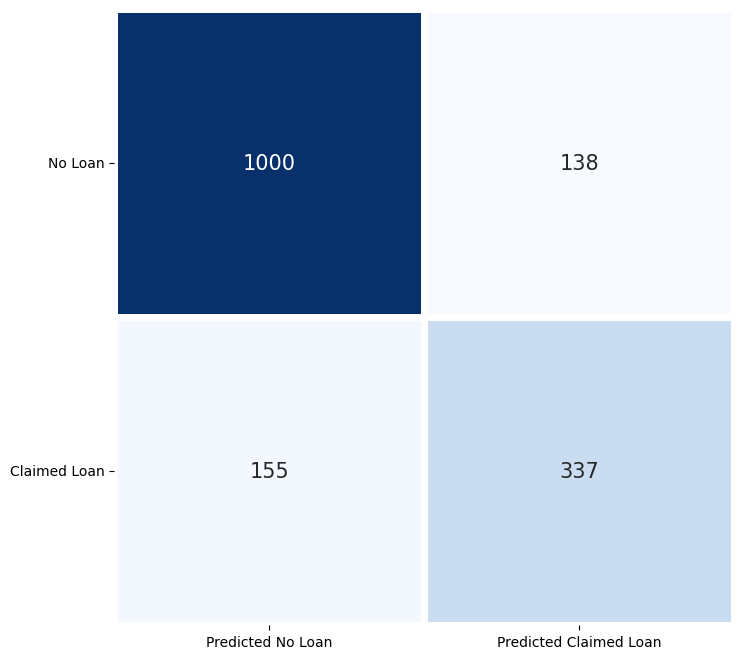

In [ ]:
cm = confusion_matrix(y_test, y_prediction)

plt.figure(figsize = (8, 8))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
            yticklabels = ['No Loan', 'Claimed Loan'], xticklabels = ['Predicted No Loan', 'Predicted Claimed Loan'])
plt.yticks(rotation = 0)
plt.show()